> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df=pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()
#There are no null values in the original dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#I will drop the PatiendId, AppointmentId for now
df.drop(['PatientId','AppointmentID','Neighbourhood'],inplace=True,axis=1)

In [6]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [7]:
#change the columns names into lower case
df.columns=[x.lower() for x in df.columns]
#change column name no-show to be no_show
df.rename(columns={'no-show':'no_show'},inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [8]:
df.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
sms_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000



### Data Cleaning (Replace this with more specific notes!)

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#Replace yes and no with values 1,0
df.no_show.replace(['Yes','No'],[1,0],inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0


In [10]:
#convert date fields into date format
df.scheduledday=pd.to_datetime(df.scheduledday).apply(lambda x:x.strftime('%Y-%m-%d'))
df.appointmentday=pd.to_datetime(df.appointmentday).apply(lambda x:x.strftime('%Y-%m-%d'))
df.scheduledday=pd.to_datetime(df.scheduledday)
df.appointmentday=pd.to_datetime(df.appointmentday)

In [11]:
#create a new column containing the difference between the scheduled_date and the appintment date
df['diff_dates']=df.appointmentday-df.scheduledday

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How many people did not show up for the appointment?)
answer: 22319
That makes 20% of the whole dataset

In [13]:
#create a sub dataframe containing info of the no=show records
subdf=df[df.no_show==1]
#drop no_show filed as all the records have the same value
subdf.drop(['no_show'],inplace=True,axis=1);

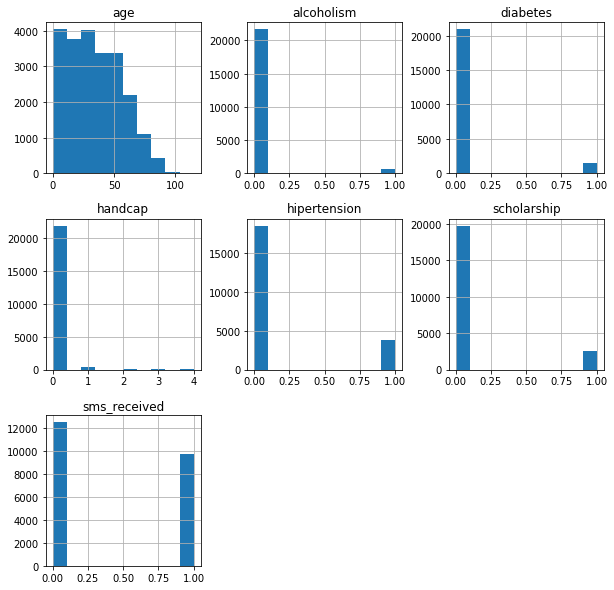

In [18]:
subdf.hist(figsize=(10,10));

In [20]:
subdf.shape

(22319, 11)

In [21]:
ratio=subdf.shape[0]/df.shape[0]
print(ratio)

0.20193255946510807


In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#extract the dufference between dates as it included days and time; then convert the difference into int
df.diff_dates=df.diff_dates.astype(str)
df.diff_dates=[int(x.split(" ")[0]) for x in df.diff_dates]


In [23]:
#drop date fields 
df.drop(['appointmentday','scheduledday'],inplace=True,axis=1)

In [24]:
df.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,diff_dates
0,F,62,0,1,0,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0,0


## Who have the biggest portion of the no-show? Females
<br>
Females=14594
<br><br>
Males=7725

In [25]:
subdf.gender.value_counts()

F    14594
M     7725
Name: gender, dtype: int64

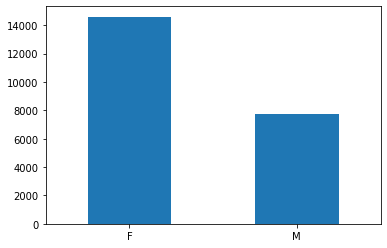

In [163]:
subdf.gender.value_counts().plot(kind='bar',rot=0);

In [28]:
#remove the rows where the differece between dates is negative
subdf.drop(index=subdf[subdf.diff_dates<0].index.tolist(),inplace=True)

## Does the sms_received column have an impact on the indivduals attendance?
No as the difference  between people who received sms and people who did not

0    12535
1     9784
Name: sms_received, dtype: int64


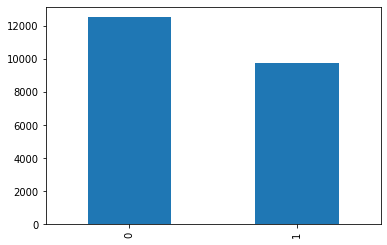

In [156]:
c=subdf.sms_received.value_counts()
print(c)
c.plot(kind='bar');

### Research Question  Who are most likely not to show up ?)
<br>
according to the graphs below, people who do not have ilnesses are more likely to ignore the appointment as they may have the notion that as long as they have no ilnesses it's ok to avoid the appointments


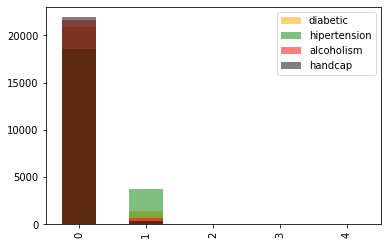

In [31]:
subdf.diabetes.value_counts().plot(kind='bar',legend=True,color='orange',
                                   label="diabetic",alpha=.5);
subdf.hipertension.value_counts().plot(kind='bar',legend=True,
                                       color='green',label='hipertension',alpha=.5);
subdf.alcoholism.value_counts().plot(kind='bar',legend=True,
                                     color='red',label='alcoholism',alpha=.5);
subdf.handcap.value_counts().plot(kind='bar',legend=True,
                                  color='black',label='handcap',alpha=.5);

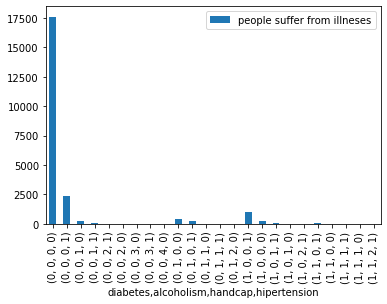

In [110]:
subdf.groupby(['diabetes','alcoholism','handcap']).hipertension.value_counts().plot(
    kind='bar',label='people suffer from illneses',legend=True);

## Does the difference between the scheduled day and the appointment day has an impact or missing the appointments?
Yes, as the graph below shows that people who got appointments on the same day of scheduling are more likely to miss those appointments; this may be because theu had other plans. Thus, the bar chart below shows a negative correlation between the differnce between the difference between the shceduling date and the appointment day, the shorter the period, the more likely to miss the appointment.

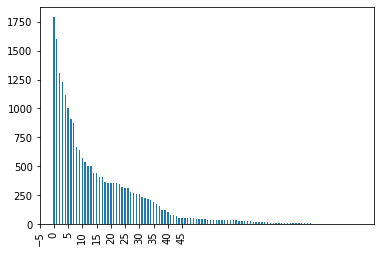

In [154]:
subdf.diff_dates.value_counts().plot(kind='bar',xticks=np.arange(-5,50,5));

<a id='conclusions'></a>
## Conclusions

The dataset contains data about the patients missing doctor appointments. It includes 110527 data samples with 22319 data samples showing patiets who missed the appointments representing 20% of the whole dataset. Concerning cleaning, the dataset has no missing values. Therefore, I did not drop any rows due to missing values. Initially, three columns (patientId,appointmentID, and neighborhood) were dropped as they did not include information that are related to the analysis. The date fileds were in the wrong data type as they were string, so they were converted into datetime type; then the difference between the dates was calculated to check whether thers is a correlation between the difference betweem dates and missing the appointments or not, finally, the original date fields were dropped and and a new field describing the difference between the dates was added. 

Concerning investigation, there is a relationship between the gender and missing the appointments as the analysis shows that men are more likely to miss the appointments more that men. Another variale is whether the patients recieved sms to remind them of the appointment or not, but this variable is not so much influencing as the results showing whether the patients received SMS or not are similar. Regarding the illneses, there is a negative correlation between whether the patients already suffer from illneses and showing up for the appointment since the results show that w so long as he patients do not suffer from illneses, they are more likely to miss the appointments.


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0